## LSTM and BiLSTM

In [1]:
#import the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.preprocessing import text,sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout

#nltk.download("stopwords")
from nltk.corpus import stopwords

nltk.download('all')
from tensorflow import keras
from tensorflow.keras import layers

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/namrathasurendrashah/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/namrathasurendrashah/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/namrathasurendrashah/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/namrathasurendrashah/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/namrathasurendrashah/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/namrathasurendrash

[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     /Users/namrathasurendrashah/nltk_data...
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     /Users/namrathasurendrashah/nltk_data...
[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     /Users/namrathasurendrashah/nltk_data...
[nltk_data]    |   Package subjectivity is already up-to-date!
[nltk_data]    | Downloading package swadesh to
[nltk_data]    |     /Users/namrathasurendrashah/nltk_data...
[nltk_data]    |   Package swadesh is already up-to-date!
[nltk_data]    | Downloading package switchboard to
[nltk_data]    |     /Users/namrathasurendrashah/nltk_data...
[nltk_data]    |   Package switchboard is already up-to-date!
[nltk_data]    | Downloading package timit to
[nltk_data]    |     /Use

### Exploratory data analysis

In [2]:
print("True news")
true = pd.read_csv("Downloads/true.csv")
true.head()

True news


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
print("Fake news")
fake = pd.read_csv("Downloads/fake.csv")
fake.head()

Fake news


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


### Add a new column for classification of true and fake news and naming it as label 

In [4]:
true['label'] = 1
fake['label'] = 0

In [5]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


### Joining true and fake news to make the complete dataset to train the model 

In [7]:
df = pd.concat([true, fake], ignore_index = True, sort = False)
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
df.tail()

,title,text,subject,date,label
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [9]:
df.describe()

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [10]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [11]:
#number of true and fake news
print("Number of true news articles:", len(true))
print("Number of fake news articles:", len(fake))

Number of true news articles: 21417
Number of fake news articles: 23481


In [12]:
#number of different types of subjects for news and their counts
print(df.subject.value_counts())

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


In [13]:
#combining necessay attributes into one attribute and dropping the ones that are not considered for
#the classification
df['text'] = df['subject'] + " " + df['title'] + " " + df['text']
del df['title']
del df['subject']
del df['date']
df.head()

,text,label
0,"politicsNews As U.S. budget fight looms, Repub...",1
1,politicsNews U.S. military to accept transgend...,1
2,politicsNews Senior U.S. Republican senator: '...,1
3,politicsNews FBI Russia probe helped by Austra...,1
4,politicsNews Trump wants Postal Service to cha...,1


In [14]:
#checking for a random dataset
example = df.text[5]
example

'politicsNews White House, Congress prepare for talks on spending, immigration WEST PALM BEACH, Fla./WASHINGTON (Reuters) - The White House said on Friday it was set to kick off talks next week with Republican and Democratic congressional leaders on immigration policy, government spending and other issues that need to be wrapped up early in the new year. The expected flurry of legislative activity comes as Republicans and Democrats begin to set the stage for midterm congressional elections in November. President Donald Trump’s Republican Party is eager to maintain control of Congress while Democrats look for openings to wrest seats away in the Senate and the House of Representatives. On Wednesday, Trump’s budget chief Mick Mulvaney and legislative affairs director Marc Short will meet with Senate Majority Leader Mitch McConnell and House Speaker Paul Ryan - both Republicans - and their Democratic counterparts, Senator Chuck Schumer and Representative Nancy Pelosi, the White House said.

### Removal of HTML content if any from the example initially

In [15]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(example, "html.parser")
example = soup.get_text()
example

'politicsNews White House, Congress prepare for talks on spending, immigration WEST PALM BEACH, Fla./WASHINGTON (Reuters) - The White House said on Friday it was set to kick off talks next week with Republican and Democratic congressional leaders on immigration policy, government spending and other issues that need to be wrapped up early in the new year. The expected flurry of legislative activity comes as Republicans and Democrats begin to set the stage for midterm congressional elections in November. President Donald Trump’s Republican Party is eager to maintain control of Congress while Democrats look for openings to wrest seats away in the Senate and the House of Representatives. On Wednesday, Trump’s budget chief Mick Mulvaney and legislative affairs director Marc Short will meet with Senate Majority Leader Mitch McConnell and House Speaker Paul Ryan - both Republicans - and their Democratic counterparts, Senator Chuck Schumer and Representative Nancy Pelosi, the White House said.

### Removal of punctuations and special characters from the example initially

In [16]:
example = re.sub('\[[^]]*\]', ' ', example)
example = re.sub('[^a-zA-Z]',' ',example)  # replaces non-alphabets with spaces
example = example.lower() # Converting from uppercase to lowercase
example

'politicsnews white house  congress prepare for talks on spending  immigration west palm beach  fla  washington  reuters    the white house said on friday it was set to kick off talks next week with republican and democratic congressional leaders on immigration policy  government spending and other issues that need to be wrapped up early in the new year  the expected flurry of legislative activity comes as republicans and democrats begin to set the stage for midterm congressional elections in november  president donald trump s republican party is eager to maintain control of congress while democrats look for openings to wrest seats away in the senate and the house of representatives  on wednesday  trump s budget chief mick mulvaney and legislative affairs director marc short will meet with senate majority leader mitch mcconnell and house speaker paul ryan   both republicans   and their democratic counterparts  senator chuck schumer and representative nancy pelosi  the white house said 

### Removal of stopwords from the example initially

In [20]:
nltk.download("stopwords")   
from nltk.corpus import stopwords
example = nltk.word_tokenize(example)
example = [ word for word in example if not word in set(stopwords.words("english"))]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/namrathasurendrashah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Lematizing the example

In [21]:
lemma = nltk.WordNetLemmatizer()
example = [ lemma.lemmatize(word) for word in example] 

example = " ".join(example)
example

'politicsnews white house congress prepare talk spending immigration west palm beach fla washington reuters white house said friday set kick talk next week republican democratic congressional leader immigration policy government spending issue need wrapped early new year expected flurry legislative activity come republican democrat begin set stage midterm congressional election november president donald trump republican party eager maintain control congress democrat look opening wrest seat away senate house representative wednesday trump budget chief mick mulvaney legislative affair director marc short meet senate majority leader mitch mcconnell house speaker paul ryan republican democratic counterpart senator chuck schumer representative nancy pelosi white house said followed weekend strategy session trump mcconnell ryan jan camp david presidential retreat maryland according white house senate return work jan house jan congress passed short term government funding bill last week takin

### Removal in all of the data

In [24]:
#Removal of HTML Contents
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

#Removal of stopwords 
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word) 
            final_text.append(word)
    return " ".join(final_text)

#Congregated removal function
def cleaning(text):
    text = remove_html(text)
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

#Apply function on text column
df['text'] = df['text'].apply(cleaning)

In [25]:
df.head()

,text,label
0,politicsnews u budget fight loom republican fl...,1
1,politicsnews u military accept transgender rec...,1
2,politicsnews senior u republican senator let m...,1
3,politicsnews fbi russia probe helped australia...,1
4,politicsnews trump want postal service charge ...,1


<AxesSubplot:title={'center':'Frequency of true and fake news'}>

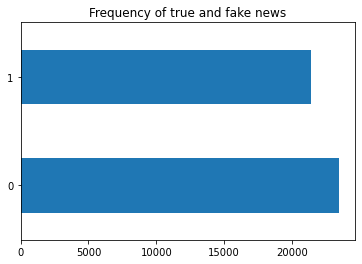

In [26]:
df['label'].value_counts().plot.barh(title= 'Frequency of true and fake news')

### Number of words in fake and true news

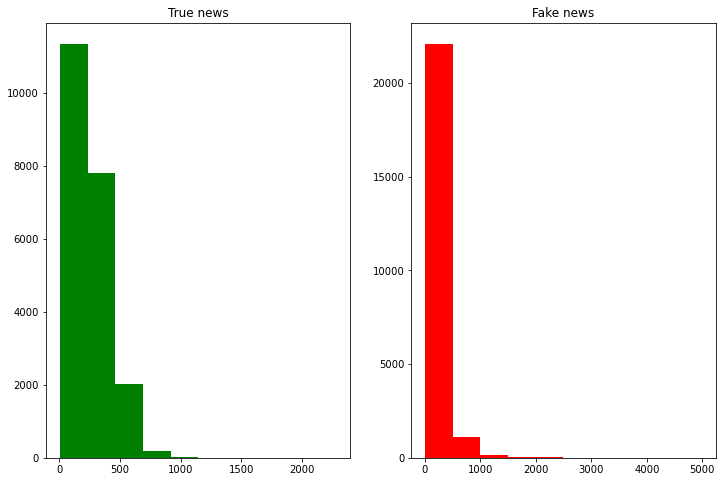

In [27]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
text_len = df[df['label'] == 1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len, color = 'Green')
ax1.set_title('True news')
text_len = df[df['label'] == 0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len, color = 'Red')
ax2.set_title('Fake news')
plt.show()

### Wordcloud of fake and true news

TRUE NEWS


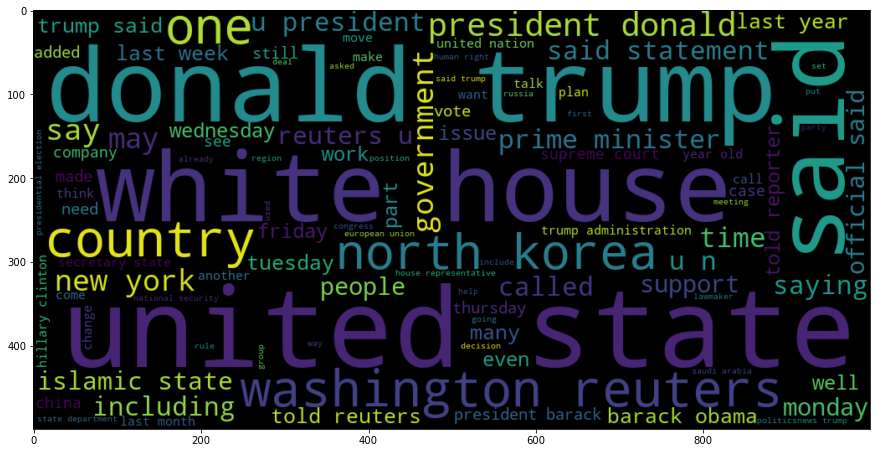

In [28]:
from wordcloud import WordCloud,STOPWORDS
print("TRUE NEWS")
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 100 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(df[df.label == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

FAKE NEWS


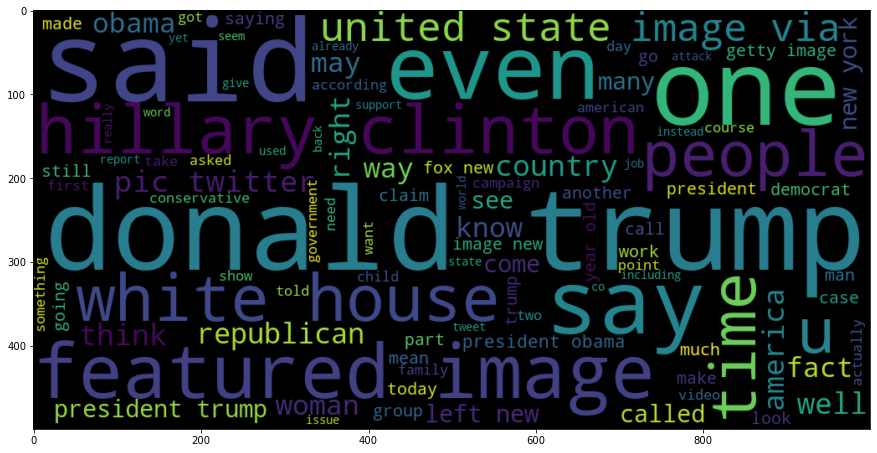

In [29]:
from wordcloud import WordCloud,STOPWORDS
print("FAKE NEWS")
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 100 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(df[df.label == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

In [30]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state=0)

In [31]:
max_features = 10000
maxlen = 300 #max number of words allowed per news

tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [32]:
batch_size = 256
epochs = 10
embed_size = 100

In [33]:
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 300, 128)          117248    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [35]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=batch_size, shuffle=True, verbose = 1)

Epoch 1/10
93/93 [==============================] - 204s 2s/step - loss: 0.5471 - accuracy: 0.7016 - val_loss: 0.3501 - val_accuracy: 0.8659
Epoch 2/10
93/93 [==============================] - 204s 2s/step - loss: 0.3475 - accuracy: 0.8479 - val_loss: 0.3073 - val_accuracy: 0.8702
Epoch 3/10
93/93 [==============================] - 204s 2s/step - loss: 0.3202 - accuracy: 0.8577 - val_loss: 0.2287 - val_accuracy: 0.9209
Epoch 4/10
93/93 [==============================] - 206s 2s/step - loss: 0.3285 - accuracy: 0.8638 - val_loss: 0.2951 - val_accuracy: 0.8796
Epoch 5/10
93/93 [==============================] - 205s 2s/step - loss: 0.2691 - accuracy: 0.8893 - val_loss: 0.2479 - val_accuracy: 0.9071
Epoch 6/10
93/93 [==============================] - 205s 2s/step - loss: 0.2475 - accuracy: 0.9012 - val_loss: 0.0750 - val_accuracy: 0.9771
Epoch 7/10
93/93 [==============================] - 206s 2s/step - loss: 0.0619 - accuracy: 0.9784 - val_loss: 0.0411 - val_accuracy: 0.9861
Epoch 8/10
93

In [36]:
print("Accuracy of LSTM on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of LSTM on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

1053/1053 [==============================] - 63s 60ms/step - loss: 0.0266 - accuracy: 0.9901
Accuracy of LSTM on Training Data is -  99.01107549667358 %
351/351 [==============================] - 21s 60ms/step - loss: 0.0270 - accuracy: 0.9899
Accuracy of LSTM on Testing Data is -  98.993319272995 %


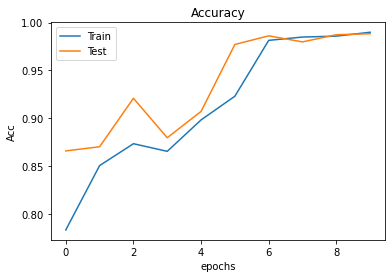

In [37]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

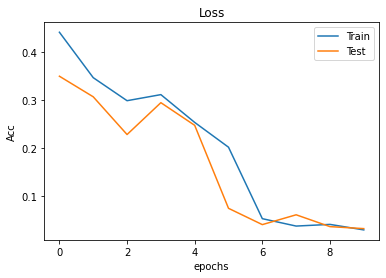

In [38]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [39]:
pred = model.predict_classes(X_test)
print(classification_report(y_test, pred, target_names = ['Fake','True']))

/Users/namrathasurendrashah/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      5858
        True       0.99      0.99      0.99      5367

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [40]:
inputs = keras.Input(shape=(None,), dtype="int32")
model = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
model = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(model)
model = layers.Bidirectional(layers.LSTM(64))(model)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(model)
models = keras.Model(inputs, outputs)
models.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,477,761
Trainable params: 1,477,761
Non-trainable params: 0
_________________________________________________________________


In [41]:
y_pred = models.predict(X_test)

from keras import backend as K

def recall_m(y_test, y_pred):
    true_positives = K.sum(K.round(K.clip(y_test * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_test, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_test, y_pred):
    true_positives = K.sum(K.round(K.clip(y_test * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_test, y_pred):
    precision = precision_m(y_test, y_pred)
    recall = recall_m(y_test, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [42]:
models.compile("adam", "binary_crossentropy", metrics=["accuracy", f1_m, precision_m, recall_m])
history = models.fit(X_train, y_train, validation_split=0.3, batch_size=batch_size, epochs=10, shuffle=True)

Epoch 1/10
93/93 [==============================] - 171s 2s/step - loss: 0.3993 - accuracy: 0.7991 - f1_m: 0.8033 - precision_m: 0.8229 - recall_m: 0.8586 - val_loss: 0.0516 - val_accuracy: 0.9838 - val_f1_m: 0.9834 - val_precision_m: 0.9739 - val_recall_m: 0.9932
Epoch 2/10
93/93 [==============================] - 169s 2s/step - loss: 0.0329 - accuracy: 0.9893 - f1_m: 0.9887 - precision_m: 0.9847 - recall_m: 0.9929 - val_loss: 0.0398 - val_accuracy: 0.9885 - val_f1_m: 0.9882 - val_precision_m: 0.9814 - val_recall_m: 0.9953
Epoch 3/10
93/93 [==============================] - 169s 2s/step - loss: 0.0144 - accuracy: 0.9969 - f1_m: 0.9968 - precision_m: 0.9959 - recall_m: 0.9977 - val_loss: 0.0348 - val_accuracy: 0.9918 - val_f1_m: 0.9916 - val_precision_m: 0.9876 - val_recall_m: 0.9957
Epoch 4/10
93/93 [==============================] - 168s 2s/step - loss: 0.0098 - accuracy: 0.9979 - f1_m: 0.9977 - precision_m: 0.9972 - recall_m: 0.9982 - val_loss: 0.0430 - val_accuracy: 0.9895 - val_f1

In [43]:
print("Accuracy of the BiLSTM on Training Data is - " , models.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the BiLSTM on Testing Data is - " , models.evaluate(X_test,y_test)[1]*100 , "%")

1053/1053 [==============================] - 59s 56ms/step - loss: 0.0156 - accuracy: 0.9966 - f1_m: 0.9962 - precision_m: 0.9967 - recall_m: 0.9960
Accuracy of the BiLSTM on Training Data is -  99.66441988945007 %
351/351 [==============================] - 19s 54ms/step - loss: 0.0579 - accuracy: 0.9883 - f1_m: 0.9876 - precision_m: 0.9905 - recall_m: 0.9854
Accuracy of the BiLSTM on Testing Data is -  98.83296489715576 %


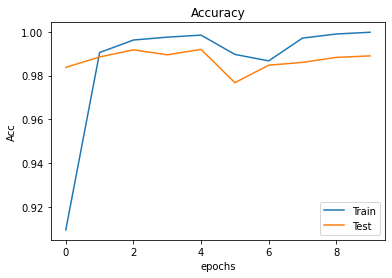

In [44]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

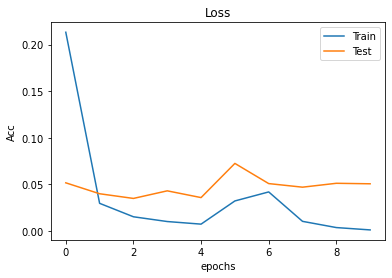

In [45]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [51]:
loss, accuracy, f1_score, precision, recall = models.evaluate(X_test, y_test, verbose=0)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

Loss:  0.05788518115878105
Accuracy:  0.9883296489715576
